COVID 19 DATA ANALYSIS

pada data kali ini saya akan mengolah data dari jhu tentang covid 19. saya akan menampilkan keseluruhan data, mengeksplorasi data, memperbaiki missing value, mengubah nama kolom data, menghapus kolom tidak terpakai, melakukan query, grouping dan visualisasi data

library yang digunakan ialah numpy dan pandas

In [1]:
import numpy as np
import pandas as pd

kemudian membaca file csv yang di buat oleh jhu tentang covid 19 terbaru

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/rionmarianto/day5/main/h8dsft_P0GC1_Rion_Marianto_Putra.csv')

In [3]:
len(df)

4016

In [4]:
df.shape

(4016, 14)

pertama sederhanakan atau ubah df menjadi covid dengan df.copy agar mempermudah

In [22]:
covid=df.copy()

kemudian tampilkan data 5 teratas dengan df.head()

In [23]:
covid.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2023-02-04 04:21:01,33.93911,67.709953,208669,7891,NaN,NaN,Afghanistan,536.033632,3.781587
1,NaN,NaN,NaN,Albania,2023-02-04 04:21:01,41.15330,20.168300,334203,3596,NaN,NaN,Albania,11613.141983,1.075993
2,NaN,NaN,NaN,Algeria,2023-02-04 04:21:01,28.03390,1.659600,271394,6881,NaN,NaN,Algeria,618.899760,2.535428
3,NaN,NaN,NaN,Andorra,2023-02-04 04:21:01,42.50630,1.521800,47850,165,NaN,NaN,Andorra,61929.722384,0.344828
4,NaN,NaN,NaN,Angola,2023-02-04 04:21:01,-11.20270,17.873900,105184,1931,NaN,NaN,Angola,320.036336,1.835831


dan data 5 terbawah dengan df.tail()

In [24]:
covid.tail()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
4011,NaN,NaN,NaN,West Bank and Gaza,2023-02-04 04:21:01,31.952200,35.233200,703228,5708,NaN,NaN,West Bank and Gaza,13784.956961,0.811686
4012,NaN,NaN,NaN,Winter Olympics 2022,2023-02-04 04:21:01,39.904200,116.407400,535,0,NaN,NaN,Winter Olympics 2022,NaN,0.000000
4013,NaN,NaN,NaN,Yemen,2023-02-04 04:21:01,15.552727,48.516388,11945,2159,NaN,NaN,Yemen,40.048994,18.074508
4014,NaN,NaN,NaN,Zambia,2023-02-04 04:21:01,-13.133897,27.849332,341397,4049,NaN,NaN,Zambia,1857.037734,1.186009
4015,NaN,NaN,NaN,Zimbabwe,2023-02-04 04:21:01,-19.015438,29.154857,262324,5658,NaN,NaN,Zimbabwe,1764.955180,2.156875


lalu data keseluruhan dengan df atau covid (yang telah disederhanakan)

In [25]:
covid

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2023-02-04 04:21:01,33.939110,67.709953,208669,7891,NaN,NaN,Afghanistan,536.033632,3.781587
1,NaN,NaN,NaN,Albania,2023-02-04 04:21:01,41.153300,20.168300,334203,3596,NaN,NaN,Albania,11613.141983,1.075993
2,NaN,NaN,NaN,Algeria,2023-02-04 04:21:01,28.033900,1.659600,271394,6881,NaN,NaN,Algeria,618.899760,2.535428
3,NaN,NaN,NaN,Andorra,2023-02-04 04:21:01,42.506300,1.521800,47850,165,NaN,NaN,Andorra,61929.722384,0.344828
4,NaN,NaN,NaN,Angola,2023-02-04 04:21:01,-11.202700,17.873900,105184,1931,NaN,NaN,Angola,320.036336,1.835831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4011,NaN,NaN,NaN,West Bank and Gaza,2023-02-04 04:21:01,31.952200,35.233200,703228,5708,NaN,NaN,West Bank and Gaza,13784.956961,0.811686
4012,NaN,NaN,NaN,Winter Olympics 2022,2023-02-04 04:21:01,39.904200,116.407400,535,0,NaN,NaN,Winter Olympics 2022,NaN,0.000000
4013,NaN,NaN,NaN,Yemen,2023-02-04 04:21:01,15.552727,48.516388,11945,2159,NaN,NaN,Yemen,40.048994,18.074508
4014,NaN,NaN,NaN,Zambia,2023-02-04 04:21:01,-13.133897,27.849332,341397,4049,NaN,NaN,Zambia,1857.037734,1.186009


eksplorasi data ada negara apa saja di data dengan 

In [29]:
covid["Province_State"].value_counts()

Texas            255
Georgia          161
Virginia         134
Kentucky         121
Missouri         117
                ... 
Tamil Nadu         1
Telangana          1
Tripura            1
Uttar Pradesh      1
Wales              1
Name: Province_State, Length: 598, dtype: int64

In [30]:
covid["Country_Region"].value_counts()

US          3279
Russia        83
Japan         49
India         37
China         34
            ... 
Guyana         1
Haiti          1
Holy See       1
Honduras       1
Zimbabwe       1
Name: Country_Region, Length: 201, dtype: int64

memperbaiki missing value data covid 19

In [33]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4016 entries, 0 to 4015
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3268 non-null   float64
 1   Admin2               3272 non-null   object 
 2   Province_State       3837 non-null   object 
 3   Country_Region       4016 non-null   object 
 4   Last_Update          4016 non-null   object 
 5   Lat                  3925 non-null   float64
 6   Long_                3925 non-null   float64
 7   Confirmed            4016 non-null   int64  
 8   Deaths               4016 non-null   int64  
 9   Recovered            0 non-null      float64
 10  Active               0 non-null      float64
 11  Combined_Key         4016 non-null   object 
 12  Incident_Rate        3922 non-null   float64
 13  Case_Fatality_Ratio  3974 non-null   float64
dtypes: float64(7), int64(2), object(5)
memory usage: 439.4+ KB


In [34]:
covid.isnull

<bound method DataFrame.isnull of       FIPS Admin2 Province_State        Country_Region          Last_Update  \
0      NaN    NaN            NaN           Afghanistan  2023-02-04 04:21:01   
1      NaN    NaN            NaN               Albania  2023-02-04 04:21:01   
2      NaN    NaN            NaN               Algeria  2023-02-04 04:21:01   
3      NaN    NaN            NaN               Andorra  2023-02-04 04:21:01   
4      NaN    NaN            NaN                Angola  2023-02-04 04:21:01   
...    ...    ...            ...                   ...                  ...   
4011   NaN    NaN            NaN    West Bank and Gaza  2023-02-04 04:21:01   
4012   NaN    NaN            NaN  Winter Olympics 2022  2023-02-04 04:21:01   
4013   NaN    NaN            NaN                 Yemen  2023-02-04 04:21:01   
4014   NaN    NaN            NaN                Zambia  2023-02-04 04:21:01   
4015   NaN    NaN            NaN              Zimbabwe  2023-02-04 04:21:01   

            Lat  

In [40]:
data_without_missing_columns=covid.dropna(axis=1)

In [41]:
data_without_missing_columns.shape

(4016, 5)

menghapus kolom yang tidak terpakai yaitu kolom FIPS dan kolom Admin2

In [43]:
kolom_tidak_terpakai=['FIPS','Admin2']

In [45]:
covid.drop(kolom_tidak_terpakai, inplace=True, axis=1)

In [46]:
covid.shape

(4016, 12)

mengubah nama kolom Province_state dengan Province dan Country_Region dengan Country

In [47]:
renamed_covid=covid.rename(
    columns={"Province_State": "Province", "Country_Region": "Country"}
)
renamed_covid.head()

,Province,Country,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,Afghanistan,2023-02-04 04:21:01,33.93911,67.709953,208669,7891,NaN,NaN,Afghanistan,536.033632,3.781587
1,NaN,Albania,2023-02-04 04:21:01,41.15330,20.168300,334203,3596,NaN,NaN,Albania,11613.141983,1.075993
2,NaN,Algeria,2023-02-04 04:21:01,28.03390,1.659600,271394,6881,NaN,NaN,Algeria,618.899760,2.535428
3,NaN,Andorra,2023-02-04 04:21:01,42.50630,1.521800,47850,165,NaN,NaN,Andorra,61929.722384,0.344828
4,NaN,Angola,2023-02-04 04:21:01,-11.20270,17.873900,105184,1931,NaN,NaN,Angola,320.036336,1.835831


Grouping total kematian di seluruh negara

In [48]:
kematian=covid["Deaths"]

In [49]:
kematian.sum()

6840178

jadi total kematian dariseluruh negara adalah 6840178

Gruoping data Country_Region dengan Deaths untuk mengetahui berapa jumlah kematian di setiap negara

In [55]:
covid.groupby("Country_Region", sort=False)["Deaths"].sum()

Country_Region
Afghanistan             7891
Albania                 3596
Algeria                 6881
Andorra                  165
Angola                  1931
                        ... 
West Bank and Gaza      5708
Winter Olympics 2022       0
Yemen                   2159
Zambia                  4049
Zimbabwe                5658
Name: Deaths, Length: 201, dtype: int64

Mengquery data kematian diatas 100000

In [61]:
kematian_2=covid[covid["Deaths"]>100000]

In [62]:
kematian_2

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
7,NaN,Argentina,2023-02-04 04:21:01,-38.416100,-63.616700,10037135,130421,NaN,NaN,Argentina,22208.125772,1.299385
66,Sao Paulo,Brazil,2023-02-04 04:21:01,-23.550500,-46.633300,6419637,178608,NaN,NaN,"Sao Paulo, Brazil",13980.335263,2.782213
217,NaN,France,2023-02-04 04:21:01,46.227600,2.213700,38495010,160751,NaN,NaN,France,58974.933048,0.417589
270,Maharashtra,India,2023-02-04 04:21:01,19.449759,76.108221,8137181,148421,NaN,NaN,"Maharashtra, India",6607.846314,1.823985
287,NaN,Indonesia,2023-02-04 04:21:01,-0.789300,113.921300,6730778,160826,NaN,NaN,Indonesia,2460.766633,2.389412
288,NaN,Iran,2023-02-04 04:21:01,32.427908,53.688046,7564614,144754,NaN,NaN,Iran,9006.248417,1.913568
514,NaN,Poland,2023-02-04 04:21:01,51.919400,19.145100,6382155,118743,NaN,NaN,Poland,16863.216661,1.860547
618,NaN,South Africa,2023-02-04 04:21:01,-30.559500,22.937500,4056701,102595,NaN,NaN,South Africa,6839.977413,2.529025
676,NaN,Turkey,2023-01-30 23:20:55,38.963700,35.243300,17042722,101492,NaN,NaN,Turkey,20207.387402,0.595515
3992,England,United Kingdom,2023-02-04 04:21:01,52.355500,-1.174300,20535061,183596,NaN,NaN,"England, United Kingdom",36684.687694,0.894061


In [63]:
kematian_2.shape

(10, 12)

visualisasi data Deaths Country_Region India dengan Incident_Rate 

In [64]:
%matplotlib inline

<AxesSubplot: xlabel='Deaths'>

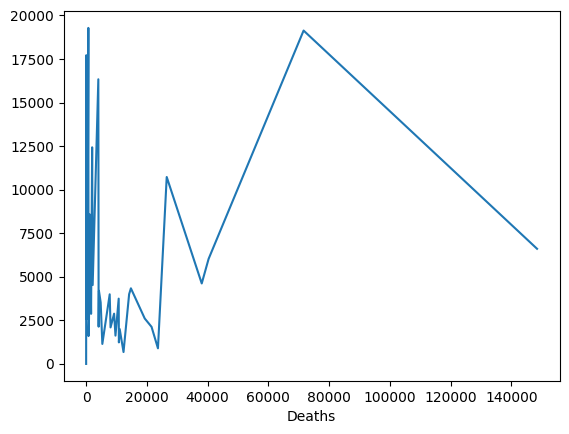

In [67]:
covid[covid["Country_Region"]=="India"].groupby("Deaths")["Incident_Rate"].sum().plot()

In [69]:
covid[covid["Country_Region"]=="India"].groupby("Deaths")["Incident_Rate"].sum()

Deaths
0             0.000000
4          1882.499302
52        17717.177048
129        2577.954901
231       10725.548600
296        4259.330718
499        6421.142454
726       19283.046761
782        1599.594612
940        2590.871396
1181       8576.893894
1625       2874.824383
1975      12431.749463
2149       4526.021779
4013      16335.508274
4111       2137.854659
4213       4196.294798
4785       3523.796295
5331       1146.744562
7753       3994.761999
8035       2095.372210
9205       2883.424733
9654       1623.525044
10714      3746.472395
10777      1235.884245
11046      2000.327246
12303       682.223962
14146      4001.116855
14733      4339.400305
19289      2606.367666
21532      2127.071404
23637       894.630747
26522     10728.461163
38049      4617.950271
40309      6028.482941
71578     19131.418941
148421     6607.846314
Name: Incident_Rate, dtype: float64

<AxesSubplot: >

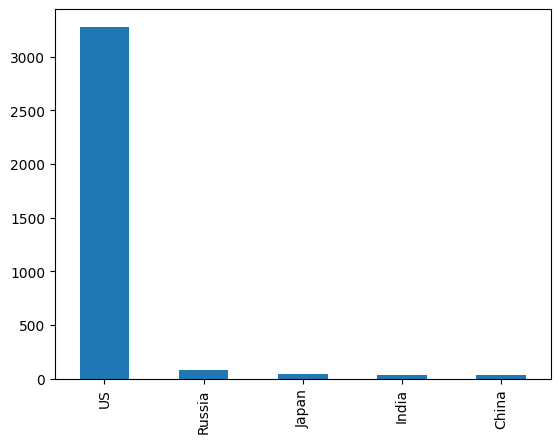

In [73]:
covid["Country_Region"].value_counts().head().plot(kind="bar")